# Data Analysis
This notebook is meant for exploritory analysis and in depth analysis of data on reddit users. Note: comments are not studied in this notebook because they are not central to the research (outside of determining pagerank) and they take a very long time to load.

## Setup

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [173]:
# Configurable constants
subreddit = "todayilearned"
download_date_string = "19.12.05-19:38:34"

data_directory = "data/"

# Derived constants
submissions_file = data_directory + subreddit + "-augmented-submissions-" + download_date_string + ".csv"
users_file = data_directory + subreddit + "-users-" + download_date_string + ".csv"

## Read Data

In [174]:
submissions = pd.read_csv(submissions_file, index_col=0)
submissions.head()

,index,submission_id,user,utc,score,title,body,subreddit,date,content,word_p_dist,entropy,novelty,transience,novelty_5,transience_5,impact,impact_5
0,974,e2mek4,Lard_Baron,1.574887e+09,53,"TIL of Joan of Leeds, an English nun, who, bor...",NaN,todayilearned,2019-11-27 20:40:08,"TIL of Joan of Leeds, an English nun, who, bor...","{'TIL': 0.018867924528301886, 'of': 0.03773584...",5.359811,NaN,7.213755,NaN,6.697788,NaN,NaN
1,973,e2mpwt,NobskaWoodsHole,1.574888e+09,35,TIL that both Mama Cass and Keith Moon died in...,NaN,todayilearned,2019-11-27 21:00:30,TIL that both Mama Cass and Keith Moon died in...,"{'TIL': 0.047619047619047616, 'that': 0.047619...",4.297079,7.437382,8.524046,NaN,7.845715,-1.086664,NaN
2,972,e2msqp,ThatLocalPessimist,1.574889e+09,48335,Today I learned that Ringo Starr was the narra...,NaN,todayilearned,2019-11-27 21:05:37,Today I learned that Ringo Starr was the narra...,"{'Today': 0.0625, 'I': 0.0625, 'learned': 0.06...",3.875000,8.822265,7.435276,NaN,7.948208,1.386990,NaN
3,971,e2mtlo,noooodlearms,1.574889e+09,1043,"TIL: In 1995, an artist named William Utermohl...",NaN,todayilearned,2019-11-27 21:07:07,"TIL: In 1995, an artist named William Utermohl...","{'TIL:': 0.02, 'In': 0.02, '1995,': 0.02, 'an'...",5.348758,7.345909,6.539400,NaN,6.886033,0.806509,NaN
4,970,e2mxse,Dota2Ethnography,1.574889e+09,237,"TIL of El Mahrousa, the official presidential ...",NaN,todayilearned,2019-11-27 21:14:45,"TIL of El Mahrousa, the official presidential ...","{'TIL': 0.0196078431372549, 'of': 0.0392156862...",5.172234,6.052112,7.536719,NaN,7.203130,-1.484607,NaN


In [175]:
# a version of submissions without nan or infinite values
safe_submissions = submissions \
    .drop('body', axis=1) \
    .replace(np.inf, np.nan) \
    .replace(-np.inf, np.nan) \
    .dropna()

In [176]:
users = pd.read_csv(users_file, index_col=0)
users.head()

,num_posts,max_score_submissions,mean_score_submissions,min_score_submissions,mean_length_submissions,mean_impact,mean_novelty,mean_transience,mean_impact_5,mean_novelty_5,mean_transience_5,num_comments,max_score_comments,mean_score_comments,min_score_comments,mean_length_comments,pagerank
user,,,,,,,,,,,,,,,,,
------__------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,181.0,0.000032
--coffeewench--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,255.0,0.000032
-Already-Taken-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,112.0,0.000032
-CluelessWoman-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,5.0,5.0,24.0,0.000032
-DementedAvenger-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,87.0,24.5,1.0,58.5,0.000032


In [177]:
# a last minute adjustment
users['ln_pagerank'] = users['pagerank'].apply(np.log)
users['ln_num_posts'] = users['num_posts'].apply(np.log)
users['ln_mean_length_submissions'] = users['mean_length_submissions'].apply(np.log)
users['ln_mean_score_submissions'] = users['mean_score_submissions'].apply(np.log)

In [178]:
# a version of users without nans (removes a lot of comment info)
safe_users = users \
    .drop('num_comments', axis=1) \
    .drop('max_score_comments', axis=1) \
    .drop('mean_score_comments', axis=1) \
    .drop('min_score_comments', axis=1) \
    .drop('mean_length_comments', axis=1) \
    .dropna()
safe_users = safe_users[np.isfinite(safe_users).all(1)] # drop infinites as well

## Exploritory Data Analysis
Lets get a feel for the data

### Exploring Submissions

#### Simple Histograms

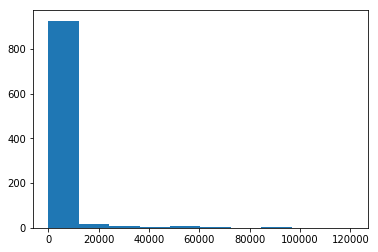

In [179]:
plt.hist(submissions['score'])
plt.show()

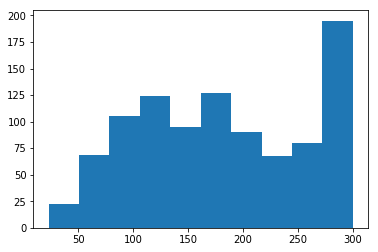

In [180]:
plt.hist(submissions['content'].apply(len))
plt.show()

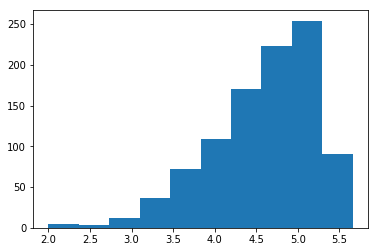

In [181]:
plt.hist(submissions['entropy'])
plt.show()

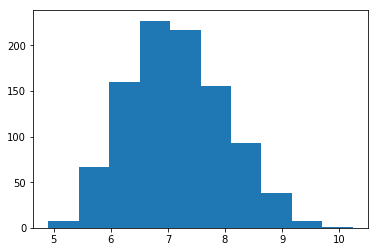

In [182]:
plt.hist(submissions['novelty'])
plt.show()

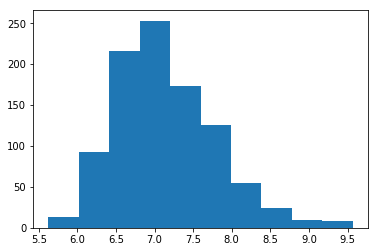

In [183]:
plt.hist(submissions['novelty_5'])
plt.show()

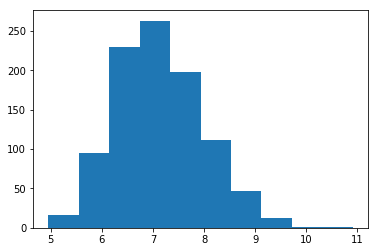

In [184]:
plt.hist(submissions['transience'])
plt.show()

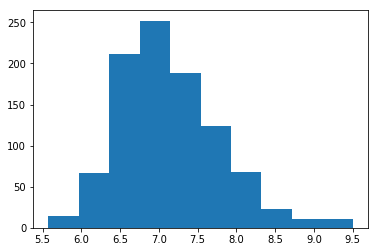

In [185]:
plt.hist(submissions['transience_5'])
plt.show()

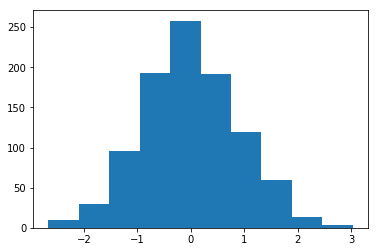

In [186]:
plt.hist(submissions['impact'])
plt.show()

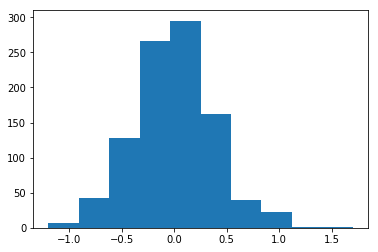

In [187]:
plt.hist(submissions['impact_5'])
plt.show()

#### Submission Scatterplots

slope: 18.20331614224935
intercept: -923.7967876281909
r: 0.14176038066814522
r-squared: 0.02009600552717744
standard error: 4.096134997479816


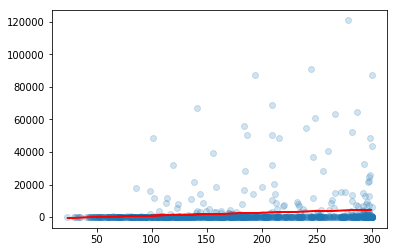

In [188]:
# scatterplot
x = safe_submissions['content'].apply(len)
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

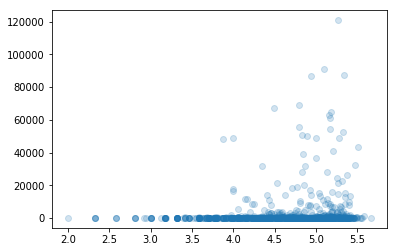

In [189]:
plt.scatter(x=submissions['entropy'], y=submissions['score'], alpha=0.2)

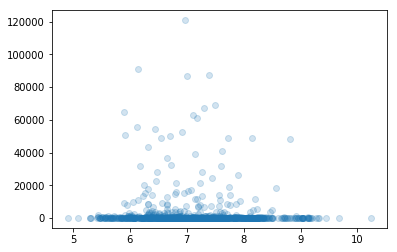

In [190]:
plt.scatter(x=submissions['novelty'], y=submissions['score'], alpha=0.2)
plt.show()

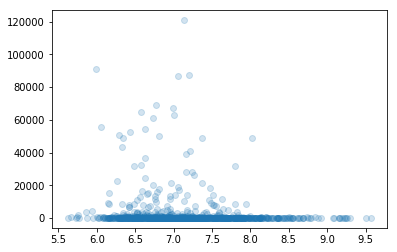

In [191]:
plt.scatter(x=submissions['novelty_5'], y=submissions['score'], alpha=0.2)
plt.show()

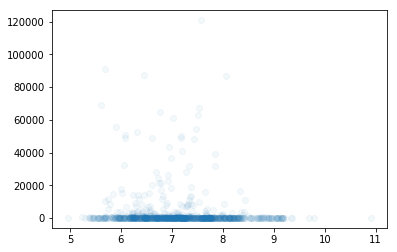

In [192]:
plt.scatter(x=submissions['transience'], y=submissions['score'], alpha=0.05)
plt.show()

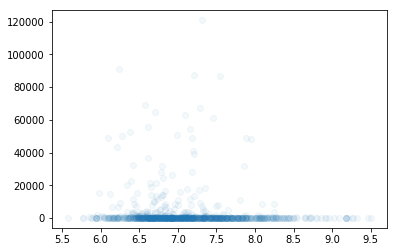

In [193]:
plt.scatter(x=submissions['transience_5'], y=submissions['score'], alpha=0.05)
plt.show()

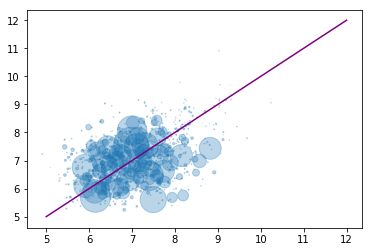

In [194]:
# novelty-transcience plot
plt.scatter(x=submissions['novelty'], y=submissions['transience'], s=submissions['score'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(5, 13)
plt.plot(domain, domain, color='purple')

plt.show()

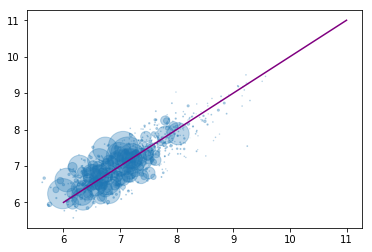

In [195]:
# novelty-transcience plot
plt.scatter(x=submissions['novelty_5'], y=submissions['transience_5'], s=submissions['score'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(6, 12)
plt.plot(domain, domain, color='purple')

plt.show()

slope: 159.86740509169215
intercept: 2385.6057377435304
r: 0.014246213086909104
r-squared: 0.00020295458731762022
standard error: 361.579059389336


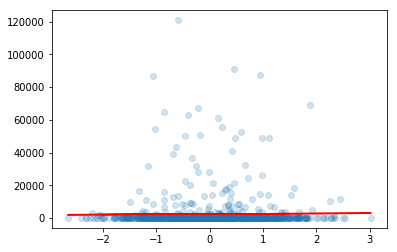

In [196]:
# scatterplot
x = safe_submissions['impact']
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

slope: -1005.0075780696848
intercept: 2390.565146736793
r: -0.03806177994813058
r-squared: 0.0014486990928199149
standard error: 850.2610598009411


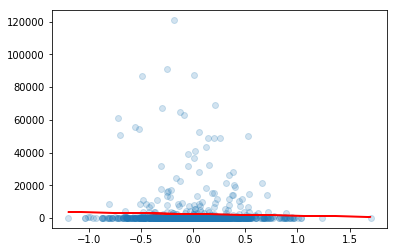

In [197]:
# scatterplot
x = safe_submissions['impact_5']
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

### Exploring Users

#### Simple Histograms

In [198]:
# helper to make this less redundant
def user_hist(column_name):
    plt.hist(users[column_name])
    plt.title("users " + column_name)
    plt.show()

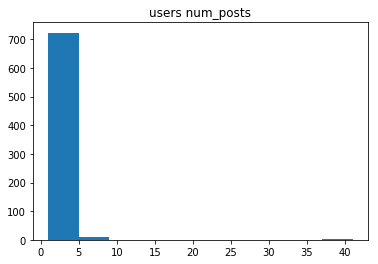

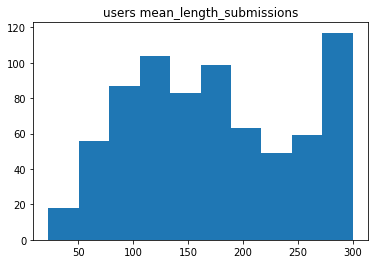

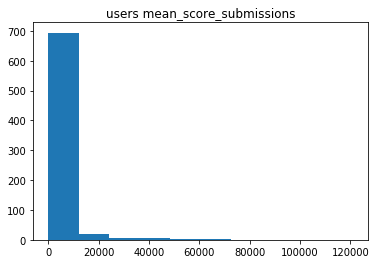

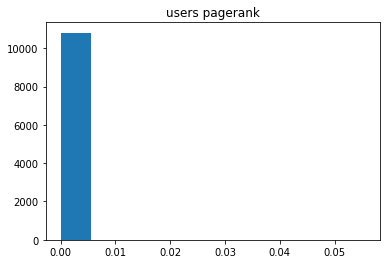

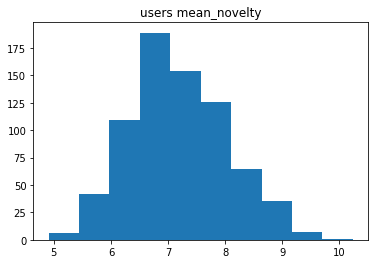

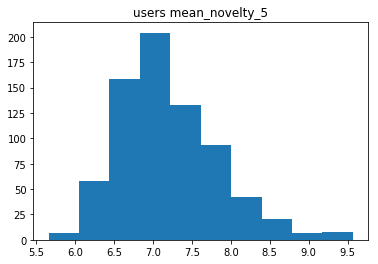

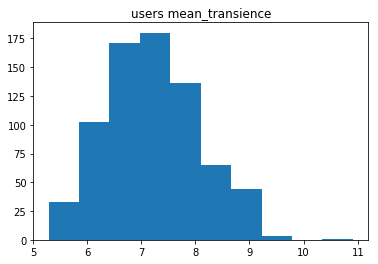

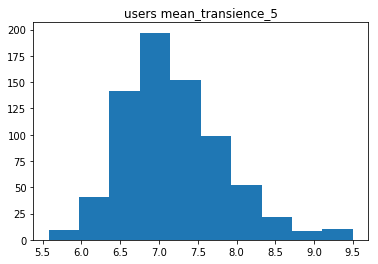

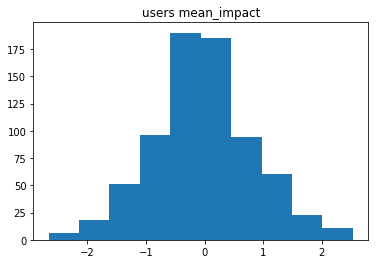

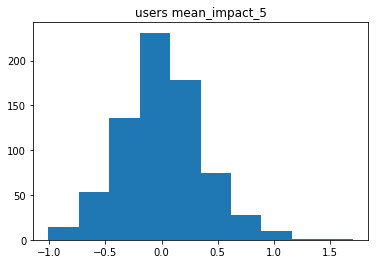

In [199]:
user_hist('num_posts')
user_hist('mean_length_submissions')
user_hist('mean_score_submissions')
user_hist('pagerank')
user_hist('mean_novelty')
user_hist('mean_novelty_5')
user_hist('mean_transience')
user_hist('mean_transience_5')
user_hist('mean_impact')
user_hist('mean_impact_5')

#### User Scatterplots

In [200]:
# a scatterplot and regression helper function
def user_scatter(x_col, y_col, alpha=0.2):
    x = safe_users[x_col]
    y = safe_users[y_col]
    
    # scatterplot
    plt.scatter(x, y, alpha=alpha)

    # best fit line
    m, b, r, p, std_err = stats.linregress(x, y)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("slope: " + str(m))
    print("intercept: " + str(b))
    print("r: " + str(r))
    print("r-squared: " + str(r**2))
    print("p: " + str(p))
    print("standard error: " + str(std_err))
    plt.plot(x, b + m * x, color="red")
    plt.title("users " + y_col + " vs " + x_col)

    plt.show()

In [201]:
safe_users.columns

Index(['num_posts', 'max_score_submissions', 'mean_score_submissions',
       'min_score_submissions', 'mean_length_submissions', 'mean_impact',
       'mean_novelty', 'mean_transience', 'mean_impact_5', 'mean_novelty_5',
       'mean_transience_5', 'pagerank', 'ln_pagerank', 'ln_num_posts',
       'ln_mean_length_submissions', 'ln_mean_score_submissions'],
      dtype='object')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.00034322571665444695
intercept: 0.0004729111813713353
r: 0.20958500699510277
r-squared: 0.04392587515713728
p: 1.4015778266289791e-08
standard error: 5.9800637464678e-05


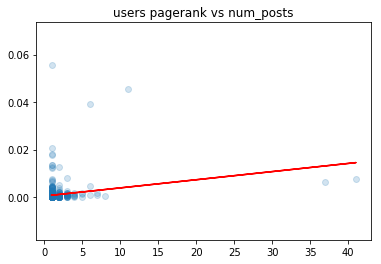

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 1.1979931774282017e-07
intercept: 0.0006483922152963839
r: 0.31412223063805805
r-squared: 0.09867277578102934
p: 6.2654151570547484e-18
standard error: 1.3521888130433843e-08


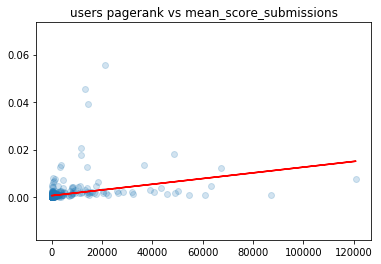

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 4.4107032105458886e-06
intercept: 0.0001614506435938986
r: 0.09353890297094647
r-squared: 0.008749526369008139
p: 0.01209679347073795
standard error: 1.7532655106188262e-06


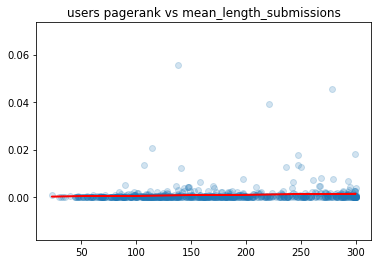

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -9.618149472300466e-05
intercept: 0.0016190956163762808
r: -0.022648256232611155
r-squared: 0.00051294351037801
p: 0.544305305167383
standard error: 0.00015855712465517597


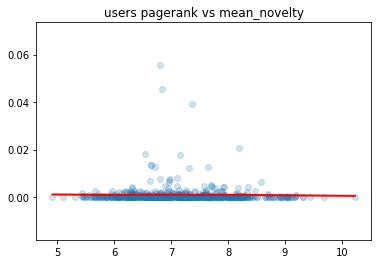

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.00036312725271068125
intercept: 0.0035387312611097114
r: -0.06552982789878573
r-squared: 0.004294158344444476
p: 0.07909545834250432
standard error: 0.00020650271516947202


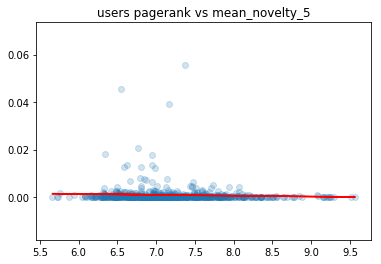

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.000376019321311741
intercept: 0.003631960678144614
r: -0.09062381914466001
r-squared: 0.008212676596364047
p: 0.015066427883235702
standard error: 0.00015431832447252282


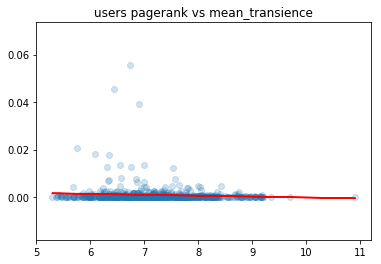

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.000537902144199051
intercept: 0.004789446586363655
r: -0.09756066772732201
r-squared: 0.00951808388740093
p: 0.008852350513194362
standard error: 0.0002049237095680991


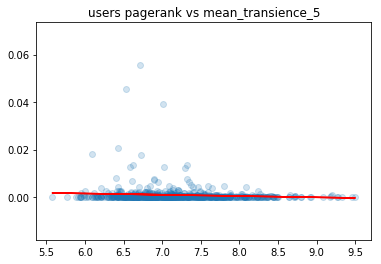

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.00027359705763604827
intercept: 0.0009380953671869161
r: 0.06726020832616113
r-squared: 0.004523935624078595
p: 0.07147770253874539
standard error: 0.000151568533150147


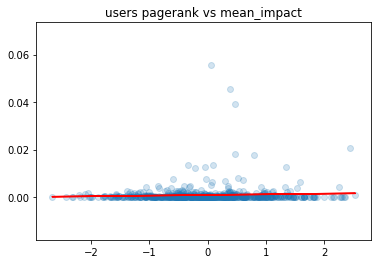

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.0005623035152454067
intercept: 0.0009258205935378671
r: 0.05747212474555571
r-squared: 0.0033030451227687167
p: 0.12364347977598848
standard error: 0.0003647837915581982


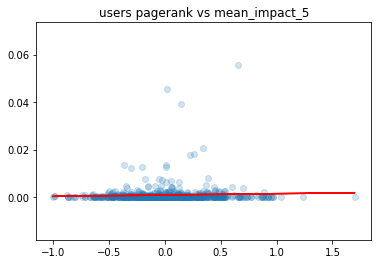

In [202]:
user_scatter('num_posts', 'pagerank')
user_scatter('mean_score_submissions', 'pagerank')
user_scatter('mean_length_submissions', 'pagerank')
user_scatter('mean_novelty', 'pagerank')
user_scatter('mean_novelty_5', 'pagerank')
user_scatter('mean_transience', 'pagerank')
user_scatter('mean_transience_5', 'pagerank')
user_scatter('mean_impact', 'pagerank')
user_scatter('mean_impact_5', 'pagerank')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 1.0812463001253316
intercept: -8.383445414270248
r: 0.32025312777658543
r-squared: 0.10256206585068596
p: 1.3046301519908138e-18
standard error: 0.11944662634000672


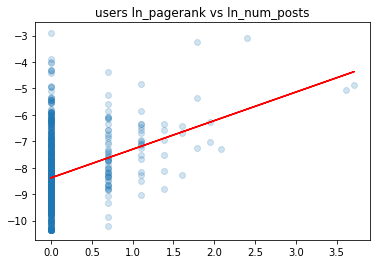

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.4867032439026912
intercept: -10.674238525964086
r: 0.7360999116794814
r-squared: 0.5418430799745403
p: 1.2027957014955396e-123
standard error: 0.016713793136013864


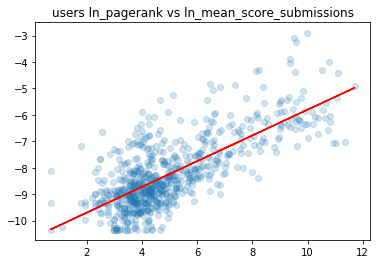

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.5870134819387576
intercept: -11.2122908620825
r: 0.21990265575548126
r-squared: 0.0483571780083137
p: 2.532509315632448e-09
standard error: 0.09725120959284407


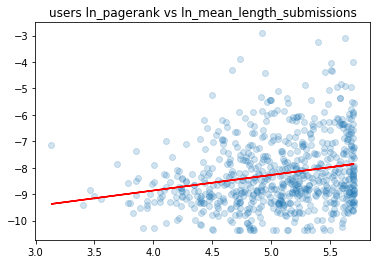

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.1412613859493823
intercept: -7.235361674990707
r: -0.08902277377538287
r-squared: 0.007925054250662996
p: 0.016955970659858575
standard error: 0.05902486522623338


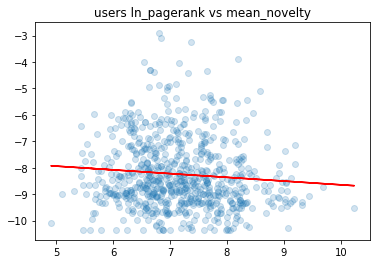

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.27394508461818773
intercept: -6.278890027269073
r: -0.1323055635423029
r-squared: 0.017504762144246355
p: 0.0003749133594926084
standard error: 0.0766462752642142


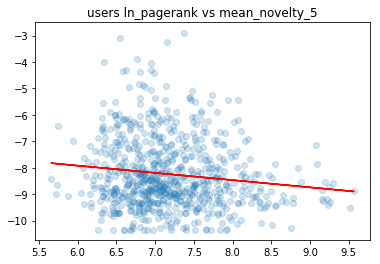

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.18132191768668016
intercept: -6.943814401784596
r: -0.11695449397103992
r-squared: 0.013678353660022013
p: 0.0016816031964445209
standard error: 0.05750201899295987


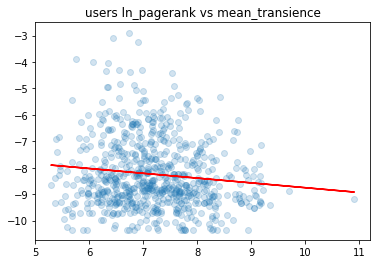

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.2732049633558482
intercept: -6.286511801437902
r: -0.13261556037877334
r-squared: 0.017586886854576076
p: 0.00036309458733684214
standard error: 0.07625733043876061


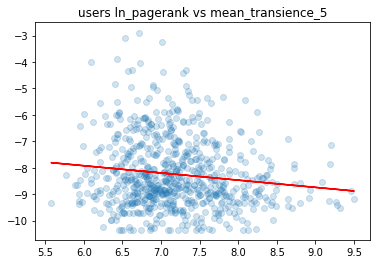

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.04524560139454616
intercept: -8.245176650362744
r: 0.029768541837557276
r-squared: 0.0008861660831343979
p: 0.4254471391654947
standard error: 0.056737044808063845


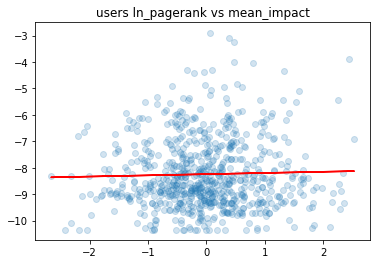

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.010660548120402813
intercept: -8.246491480272523
r: 0.002916086490176059
r-squared: 8.503560418187327e-06
p: 0.9377830522729997
standard error: 0.1365267366670916


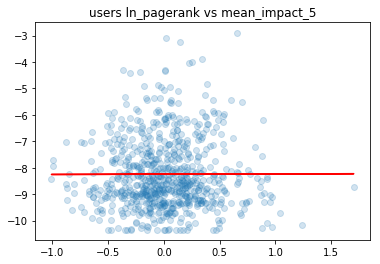

In [203]:
user_scatter('ln_num_posts', 'ln_pagerank')
user_scatter('ln_mean_score_submissions', 'ln_pagerank')
user_scatter('ln_mean_length_submissions', 'ln_pagerank')
user_scatter('mean_novelty', 'ln_pagerank')
user_scatter('mean_novelty_5', 'ln_pagerank')
user_scatter('mean_transience', 'ln_pagerank')
user_scatter('mean_transience_5', 'ln_pagerank')
user_scatter('mean_impact', 'ln_pagerank')
user_scatter('mean_impact_5', 'ln_pagerank')

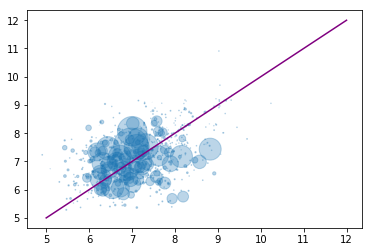

In [204]:
# novelty-transcience plot
plt.scatter(x=users['mean_novelty'], y=users['mean_transience'], s=users['mean_score_submissions'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(5, 13)
plt.plot(domain, domain, color='purple')

plt.show()

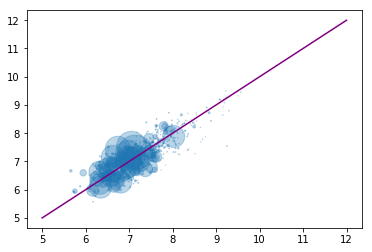

In [205]:
# novelty-transcience plot
plt.scatter(x=users['mean_novelty_5'], y=users['mean_transience_5'], s=users['mean_score_submissions'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(5, 13)
plt.plot(domain, domain, color='purple')

plt.show()

### Graphs for Paper

In [207]:
# helper to make this less redundant
def user_hist_paper(column_name, x_title, y_title, graph_title):
    plt.hist(users[column_name])
    plt.title(graph_title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.show()

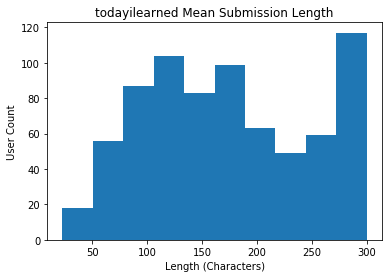

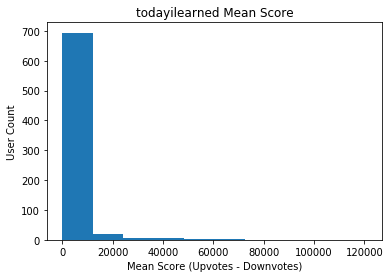

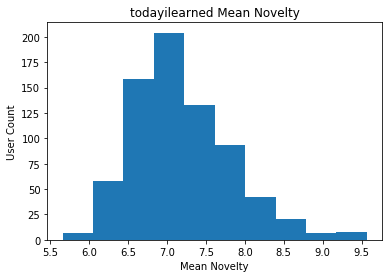

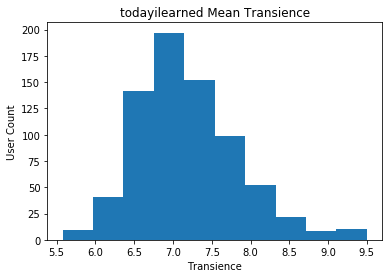

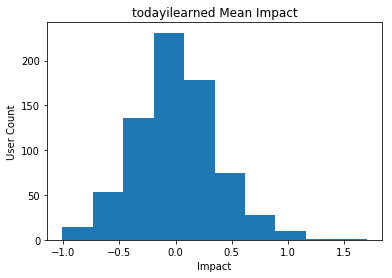

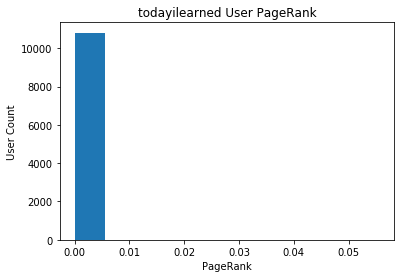

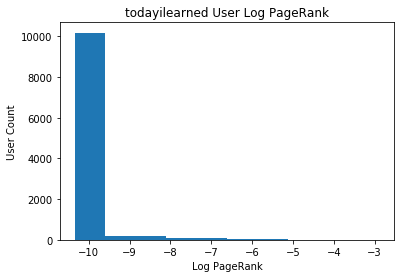

In [213]:
user_hist_paper("mean_length_submissions","Length (Characters)","User Count", subreddit + " Mean Submission Length")
user_hist_paper("mean_score_submissions","Mean Score (Upvotes - Downvotes)","User Count", subreddit + " Mean Score")
user_hist_paper("mean_novelty_5","Mean Novelty","User Count", subreddit + " Mean Novelty")
user_hist_paper("mean_transience_5","Transience","User Count", subreddit + " Mean Transience")
user_hist_paper("mean_impact_5","Impact","User Count", subreddit + " Mean Impact")
user_hist_paper("pagerank","PageRank","User Count", subreddit + " User PageRank")
user_hist_paper("ln_pagerank","Log PageRank","User Count", subreddit + " User Log PageRank")

In [212]:
# a scatterplot and regression helper function
def user_scatter_paper(x_col, y_col, x_title, y_title, graph_title, alpha=0.2):
    x = safe_users[x_col]
    y = safe_users[y_col]
    
    # scatterplot
    plt.scatter(x, y, alpha=alpha)

#     # best fit line
#     m, b, r, p, std_err = stats.linregress(x, y)
#     print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
#     print("slope: " + str(m))
#     print("intercept: " + str(b))
#     print("r: " + str(r))
#     print("r-squared: " + str(r**2))
#     print("p: " + str(p))
#     print("standard error: " + str(std_err))
#     plt.plot(x, b + m * x, color="red")
#     plt.title("users " + y_col + " vs " + x_col)

    plt.show()